In [26]:
from rdkit.Chem import MACCSkeys                       #MACCS Keys
from rdkit import Chem, DataStructs
from rdkit.ML.Cluster import Butina

import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

class std_tendency():
    
    # if i instantiate something here, 
    # a class variable is shared by all class instances
    
    # >> it would be a 'class attribute'
    
    def __init__(self,wdir,csv,chem_num): 
        # >> it would be a instance attribute 
        self.wdir = wdir
        self.csv = csv
        self.chem_num = chem_num
        
        self.c0, self.c1, self.c2, self.c3, self.c4 = [], [], [], [], []
        self.c0_x, self.c1_x, self.c2_x, self.c3_x, self.c4_x = [], [], [], [], []
        self.c4_stdval, self.c4_stdval_x = [], []
        
        self.df = pd.read_csv(self.wdir+self.csv)
        self.maccfps = std_tendency.get_maccfps(self)
        # >> if i do it like the above, we can bring the value with just call the attribute
        # >> when we instantiate the class, a certain value would be produced
        self.chem_sim = std_tendency.get_sim(self)
        
        self.datasize = len(self.df) #shape[1] is columns, and shape[0] is rows   
        
        self.df_stdval = std_tendency.get_df_stdval(self)
        self.df_stdsim = std_tendency.get_df_stdsim(self)
        self.df_std_sim_label = std_tendency.get_df_stdval_sim_label(self)
        
    '''
    class BB: 
    
    def __init__(self,name):
        self.name = name 
        self.all = []
        
    def add_some(self,some):  # >> some is from global value, when we want to use this function
        self.all.append(some) 
        # >> in the class method function, we can use class attribute
    '''

    def get_maccfps(self):
        df = self.df
        df['Standard Value'].dropna(axis=0)
        smi = df['Canonical Smiles']
        sd = [Chem.MolFromSmiles(m) for m in smi] 
        maccfps = [MACCSkeys.GenMACCSKeys(m) for m in sd]
        return maccfps
        
    def get_sim(self):
        result = DataStructs.BulkTanimotoSimilarity(self.maccfps[self.chem_num],self.maccfps[:])
        return result 
    
    def get_df_stdval(self):
        df = self.df
        return df['Standard Value'].dropna(axis=0)
    
    
    def get_df_stdsim(self):
        
        df_sim =pd.DataFrame(self.chem_sim)
        
        df_result = pd.concat([self.df_stdval,df_sim],axis=1,ignore_index=True)
        df_result.columns = ['Standard_Value','Similarity']
        return df_result
    
    def get_df_stdval_sim_label(self):
        
        df_result = self.df_stdsim
                
        cluster_label = []

        for row in df_result['Similarity']:
            if row >= 0.8 : 
                cluster_label.append('c4')
            elif row >= 0.6 : 
                cluster_label.append('c3')
            elif row >= 0.4 : 
                cluster_label.append('c2')
            elif row >= 0.2 : 
                cluster_label.append('c1')
            else : 
                cluster_label.append('c0')
        
        df_result['cluster_label'] = cluster_label
        
        for i in range(len(df_result)):
            if df_result.loc[i]['cluster_label'] == 'c4':
                self.c4_stdval.append(df_result.loc[i]['Standard_Value'])
                self.c4_stdval_x.append(i)
    

    def classify_data_as_sim(self):
        
        # sim score between 0.0 - 1.0 
        # 0-0.2  >>> class0
        # 0.2 - 0.4 >>> class1 
        # 0.4 - 0.6 >>> class2 
        # 0.6 - 0.8 >>> class3 
        # 0.8 - 1.0 >>> class4 (interesting label)

        for i in range(len(self.chem_sim)):
            if 0.0 <= self.chem_sim[i] <= 0.2: 
                self.c0.append(self.chem_sim[i])
                self.c0_x.append(i)
            elif 0.2 < self.chem_sim[i] <= 0.4 :
                self.c1.append(self.chem_sim[i])
                self.c1_x.append(i)
            elif 0.4 < self.chem_sim[i] <= 0.6 :
                self.c2.append(self.chem_sim[i])
                self.c2_x.append(i)
            elif 0.6 < self.chem_sim[i] <= 0.8 :
                self.c3.append(self.chem_sim[i])
                self.c3_x.append(i)
            elif 0.8 < self.chem_sim[i] <= 1.0 : 
                self.c4.append(self.chem_sim[i])
                self.c4_x.append(i)
        
    
    def std_scatter_of_total_sim(self):
        
        self.classify_data_as_sim()
    
        plt.scatter(self.c0_x,self.c0,c='blue',label='class0')
        plt.scatter(self.c1_x,self.c1,c='black',label='class1')
        plt.scatter(self.c2_x,self.c2,c='yellow',label='class2')
        plt.scatter(self.c3_x,self.c3,c='green',label='class3')
        plt.scatter(self.c4_x,self.c4,c='red',label='class4')
        plt.show()
        
    
    def std_scatter_of_high_sim(self):
                
        plt.scatter(self.c4_stdval_x,self.c4_stdval,c='red',label='class4')
        

    def c4_variance(self):
        if not self.c4_stdval : 
            return print("--- no value ---\n Please get scatter plot first.")
        else : 
            return np.var(self.c4_stdval)
        
      

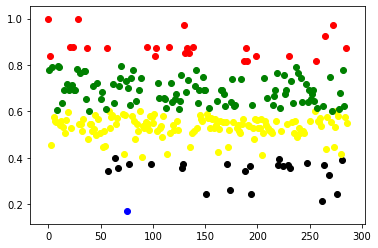

 a is 
[32.36, 32.36, 6.0, 21.0, 11.0, 34.67, 7.943, 32.36, 114.82, 79.43, 114.82, 562.34, 89.13, 34.67, 1000.0, 120.0, 3.4, 35.0, 63.0, 17.0, 17.0, 32.0, 1000.0, 560.0, 8.6]
 from a -> 81946.1033885056
 func_var -> 81946.1033885056
log val -> 11.313817034396056

 287


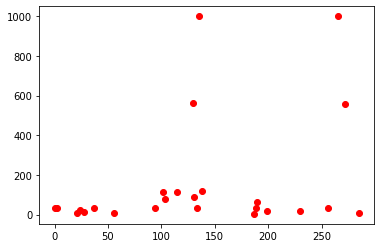

In [27]:
wdir = '/Users/beomjin_seo/Documents/work_space/kist-europe/QSAR/AOP_data/'
csv = 'final_ic50.csv' 
chem_num = 0
# you can enter a number as order of chemical molcules 
# 0 ~ 286

molcule = std_tendency(wdir,csv,chem_num)
molcule.std_scatter_of_total_sim()
molcule.std_scatter_of_high_sim()
a = molcule.c4_stdval
b = np.var(a)
b
print(f' a is \n{a}\n from a -> {b}\n func_var -> {molcule.c4_variance()}\nlog val -> {np.log(b)}')
print('\n', molcule.datasize)

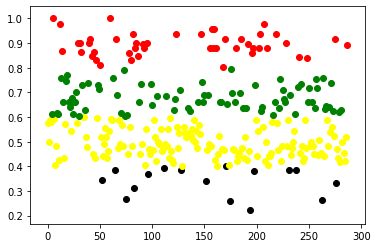

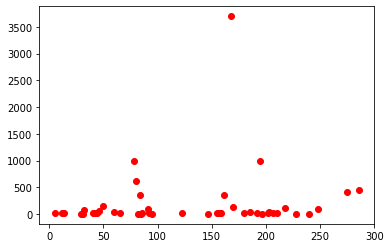

In [49]:
mol = std_tendency(wdir,csv,5)
mol.std_scatter_of_total_sim()
mol.std_scatter_of_high_sim()

In [48]:
variance_tendency,variance_tendency_x = [],[]
for i in range(287):
    mol = std_tendency(wdir,csv,i)
    variance_tendency.append(mol.c4_variance())
    variance_tendency_x.append(i)

In [58]:
variance_tendency
log_variance = []
for i in variance_tendency:
    log_variance.append(np.log(i))
    


/Users/beomjin_seo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [63]:
variance_tendency

[81946.1033885056,
 63930.07884975147,
 54506.02120098437,
 0.0,
 2142570.0430705105,
 319356.499022182,
 nan,
 12334789.041983468,
 2098505.2569709932,
 4236414.233714767,
 2142570.0430705105,
 9737893.536445618,
 320072.25212313264,
 120353.95722222223,
 8663.440763888886,
 4993113.678346001,
 114145.42736450616,
 182.25,
 2707951.617098156,
 117573.04026666669,
 4993113.678346001,
 8318366.118696487,
 10498612.24489796,
 8360428.815429079,
 9687361.556075994,
 4993113.678346001,
 4993113.678346001,
 15690351.89853475,
 81946.1033885056,
 55415.79243243243,
 8792912.7984,
 55415.79243243243,
 51557.27897500001,
 101782.86904320985,
 2142494.0363682895,
 2142494.0363682895,
 nan,
 65262.85590194461,
 7624096.0,
 111512.35562500001,
 55415.79243243243,
 49915.57658574381,
 5699.934488888888,
 1064292.64085584,
 14480.839965397923,
 310472.6666666667,
 5412.728928199793,
 156371.0972740741,
 101782.86904320985,
 212914.8888888889,
 114429.63821428572,
 3650127.3440234377,
 0.0,
 116221.

In [59]:
log_variance

[11.313817034396056,
 11.065545247136384,
 10.906066455300794,
 -inf,
 14.577516621134635,
 12.674063309564506,
 nan,
 16.32793420540644,
 14.556735866861528,
 15.259227769806918,
 14.577516621134635,
 16.09153538287036,
 12.67630203717445,
 11.698192323619736,
 9.066867239493336,
 15.42357025676733,
 11.645228593025994,
 5.2053793708887675,
 14.811703046199653,
 11.67481503873189,
 15.42357025676733,
 15.933976413547956,
 16.16675363924033,
 15.939020277457018,
 16.086332661555918,
 15.42357025676733,
 15.42357025676733,
 16.5685565526626,
 11.313817034396056,
 10.922619894070198,
 15.989456591150585,
 10.922619894070198,
 10.850448681707853,
 11.530597088419237,
 14.577481145958151,
 14.577481145958151,
 nan,
 11.08617833109516,
 15.846824316052219,
 11.621890676523297,
 10.922619894070198,
 10.818088389055983,
 8.648209960579207,
 13.877820949465946,
 9.580581672917347,
 12.645851146421753,
 8.596508667619482,
 11.959987289977827,
 11.530597088419237,
 12.268647782155856,
 11.647715

(10000, 500000)

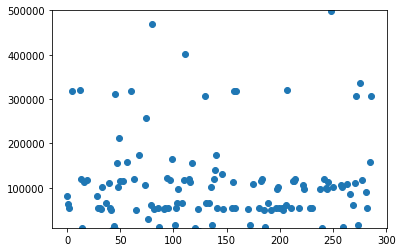

In [66]:
plt.scatter(variance_tendency_x,variance_tendency)
plt.ylim(10000,500000)

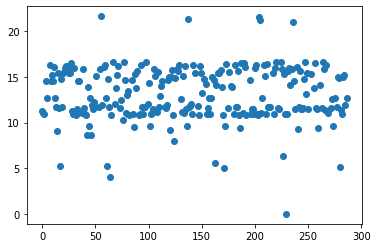

In [60]:
plt.scatter(variance_tendency_x,log_variance)